In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 183 kB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from category_encoders.hashing import HashingEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

Mount google drive storage.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load sampled ELGH data

In [ ]:
df_el_sampled = pd.read_csv("/content/drive/MyDrive/MSc-project-lof/df_el_sampled_5k.csv")

In [ ]:
df_el_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHR                 5000 non-null   object 
 1   POS                 5000 non-null   float64
 2   rsid                5000 non-null   object 
 3   SNPID               5000 non-null   object 
 4   Allele1             5000 non-null   object 
 5   Allele2             5000 non-null   object 
 6   AC_Allele2          5000 non-null   float64
 7   AF_Allele2          5000 non-null   float64
 8   imputationInfo      5000 non-null   float64
 9   N                   5000 non-null   int64  
 10  BETA                5000 non-null   float64
 11  SE                  5000 non-null   float64
 12  Tstat               5000 non-null   float64
 13  p.value             5000 non-null   float64
 14  p.value.NA          5000 non-null   float64
 15  Is.SPA.converge     5000 non-null   int64  
 16  varT  

Drop columns not required as per schema.

In [ ]:
drop_list = ['SNPID','imputationInfo','N','BETA','SE','Tstat','p.value','p.value.NA',
             'Is.SPA.converge','varT','varTstar','AF.Cases','N.Cases','N.Controls',
             'homN_Allele2_cases','hetN_Allele2_cases','AF_Allele2']

In [ ]:
df_el_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHR                 5000 non-null   object 
 1   POS                 5000 non-null   float64
 2   rsid                5000 non-null   object 
 3   Allele1             5000 non-null   object 
 4   Allele2             5000 non-null   object 
 5   AC_Allele2          5000 non-null   float64
 6   AF.Controls         5000 non-null   float64
 7   homN_Allele2_ctrls  5000 non-null   int64  
 8   hetN_Allele2_ctrls  5000 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 351.7+ KB


Load VEP annotations extracted from Ensembl VEP

In [ ]:
df_vep_lookup = pd.read_csv("/content/drive/MyDrive/MSc-project-lof/VEP Annotation Lookup 5k sample.csv")

In [ ]:
df_vep_lookup

,rsid,VEP Annotation
0,1:2065178:C:A,intron_variant
1,1:2395269:T:C,intron_variant
2,1:3126160:A:G,intron_variant
3,1:3634459:C:A,intron_variant
4,1:5912533:A:G,intron_variant
...,...,...
3023,X:150437045:G:C,intron_variant
3024,X:150629258:G:A,intron_variant
3025,X:150731120:G:A,intron_variant
3026,X:151568610:T:C,intron_variant


Join VEP and ELGH data.

In [ ]:
df_el_sampled = df_el_sampled.join(df_vep_lookup.set_index("rsid"),on="rsid")

In [ ]:
df_el_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHR                 5000 non-null   object 
 1   POS                 5000 non-null   float64
 2   rsid                5000 non-null   object 
 3   Allele1             5000 non-null   object 
 4   Allele2             5000 non-null   object 
 5   AC_Allele2          5000 non-null   float64
 6   AF.Controls         5000 non-null   float64
 7   homN_Allele2_ctrls  5000 non-null   int64  
 8   hetN_Allele2_ctrls  5000 non-null   int64  
 9   VEP Annotation      3028 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 390.8+ KB


Drop rows with null values.

In [ ]:
df_el_sampled.dropna(inplace=True)

In [ ]:
df_el_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3028 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHR                 3028 non-null   object 
 1   POS                 3028 non-null   float64
 2   rsid                3028 non-null   object 
 3   Allele1             3028 non-null   object 
 4   Allele2             3028 non-null   object 
 5   AC_Allele2          3028 non-null   float64
 6   AF.Controls         3028 non-null   float64
 7   homN_Allele2_ctrls  3028 non-null   int64  
 8   hetN_Allele2_ctrls  3028 non-null   int64  
 9   VEP Annotation      3028 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 260.2+ KB


VEP frequencies.

In [ ]:
df_el_sampled['VEP Annotation'].value_counts()

intron_variant                        2919
non_coding_transcript_exon_variant      90
5_prime_UTR_variant                     11
splice_region_variant                    4
stop_gained                              3
splice_acceptor_variant                  1
Name: VEP Annotation, dtype: int64

Add columns and values and rename columns to make compatible with schema.

In [ ]:
df_el_sampled['Allele Count South Asian'] = df_el_sampled['AC_Allele2']

In [ ]:
df_el_sampled['Allele Number South Asian'] = df_el_sampled['AC_Allele2'] / df_el_sampled['AF.Controls']

In [ ]:
df_el_sampled['Homozygote Count South Asian'] = df_el_sampled['homN_Allele2_ctrls']

In [ ]:
df_el_sampled["Hemizygote Count"] = 0
df_el_sampled["Allele Count African/African-American"] = 0
df_el_sampled["Allele Number African/African-American"] = 0
df_el_sampled["Homozygote Count African/African-American"] = 0
df_el_sampled["Hemizygote Count African/African-American"] = 0
df_el_sampled["Allele Count Latino/Admixed American"] = 0
df_el_sampled["Allele Number Latino/Admixed American"] = 0
df_el_sampled["Homozygote Count Latino/Admixed American"] = 0
df_el_sampled["Hemizygote Count Latino/Admixed American"] = 0
df_el_sampled["Allele Count Ashkenazi Jewish"] = 0
df_el_sampled["Allele Number Ashkenazi Jewish"] = 0
df_el_sampled["Homozygote Count Ashkenazi Jewish"] = 0
df_el_sampled["Hemizygote Count Ashkenazi Jewish"] = 0
df_el_sampled["Allele Count East Asian"] = 0
df_el_sampled["Allele Number East Asian"] = 0
df_el_sampled["Homozygote Count East Asian"] = 0
df_el_sampled["Hemizygote Count East Asian"] = 0
df_el_sampled["Allele Count European (Finnish)"] = 0
df_el_sampled["Allele Number European (Finnish)"] = 0
df_el_sampled["Homozygote Count European (Finnish)"] = 0
df_el_sampled["Hemizygote Count European (Finnish)"] = 0
df_el_sampled["Allele Count European (non-Finnish)"] = 0
df_el_sampled["Allele Number European (non-Finnish)"] = 0
df_el_sampled["Homozygote Count European (non-Finnish)"] = 0
df_el_sampled["Hemizygote Count European (non-Finnish)"] = 0
df_el_sampled["Allele Count Other"] = 0
df_el_sampled["Allele Number Other"] = 0
df_el_sampled["Homozygote Count Other"] = 0
df_el_sampled["Hemizygote Count Other"] = 0
df_el_sampled["Hemizygote Count South Asian"] = 0
df_el_sampled["oe_lof_upper"] = 0

In [ ]:
df_el_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3028 entries, 0 to 4998
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   CHR                                        3028 non-null   object 
 1   POS                                        3028 non-null   float64
 2   rsid                                       3028 non-null   object 
 3   Allele1                                    3028 non-null   object 
 4   Allele2                                    3028 non-null   object 
 5   AC_Allele2                                 3028 non-null   float64
 6   AF.Controls                                3028 non-null   float64
 7   homN_Allele2_ctrls                         3028 non-null   int64  
 8   hetN_Allele2_ctrls                         3028 non-null   int64  
 9   VEP Annotation                             3028 non-null   object 
 10  Allele Count South Asian

In [ ]:
df_el_sampled.rename(columns={"CHR": "Chromosome",
                              "Allele1": "Reference",
                              "Allele2": "Alternate",
                              "AC_Allele2": "Allele Count",
                              "AF.Controls": "Allele Frequency",
                              "homN_Allele2_ctrls": "Homozygote Count"},inplace=True)

In [ ]:
df_el_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3028 entries, 0 to 4998
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Chromosome                                 3028 non-null   object 
 1   POS                                        3028 non-null   float64
 2   rsid                                       3028 non-null   object 
 3   Reference                                  3028 non-null   object 
 4   Alternate                                  3028 non-null   object 
 5   Allele Count                               3028 non-null   float64
 6   Allele Frequency                           3028 non-null   float64
 7   Homozygote Count                           3028 non-null   int64  
 8   hetN_Allele2_ctrls                         3028 non-null   int64  
 9   VEP Annotation                             3028 non-null   object 
 10  Allele Count South Asian

Drop columns

In [ ]:
drop_list2 = ['rsid','hetN_Allele2_ctrls','POS']
df_el_sampled.drop(drop_list2,axis=1,inplace=True)

In [ ]:
df_el_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3028 entries, 0 to 4998
Data columns (total 41 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Chromosome                                 3028 non-null   object 
 1   Reference                                  3028 non-null   object 
 2   Alternate                                  3028 non-null   object 
 3   Allele Count                               3028 non-null   float64
 4   Allele Frequency                           3028 non-null   float64
 5   Homozygote Count                           3028 non-null   int64  
 6   VEP Annotation                             3028 non-null   object 
 7   Allele Count South Asian                   3028 non-null   float64
 8   Allele Number South Asian                  3028 non-null   float64
 9   Homozygote Count South Asian               3028 non-null   int64  
 10  Hemizygote Count        

Set clinical significane as benign

In [ ]:
df_el_sampled['ClinVar Clinical Significance'] = "Benign"

In [ ]:
df_el_sampled = df_el_sampled[["Chromosome","Reference","Alternate","VEP Annotation",
                               "ClinVar Clinical Significance",
                               "Allele Count","Allele Frequency","Homozygote Count",
                               "Hemizygote Count","Allele Count African/African-American",
                               "Allele Number African/African-American",
                               "Homozygote Count African/African-American",
                               "Hemizygote Count African/African-American",
                               "Allele Count Latino/Admixed American",
                               "Allele Number Latino/Admixed American",
                               "Homozygote Count Latino/Admixed American",
                               "Hemizygote Count Latino/Admixed American",
                               "Allele Count Ashkenazi Jewish","Allele Number Ashkenazi Jewish",
                               "Homozygote Count Ashkenazi Jewish",
                               "Hemizygote Count Ashkenazi Jewish","Allele Count East Asian",
                               "Allele Number East Asian","Homozygote Count East Asian",
                               "Hemizygote Count East Asian","Allele Count European (Finnish)",
                               "Allele Number European (Finnish)","Homozygote Count European (Finnish)",
                               "Hemizygote Count European (Finnish)","Allele Count European (non-Finnish)",
                               "Allele Number European (non-Finnish)",
                               "Homozygote Count European (non-Finnish)",
                               "Hemizygote Count European (non-Finnish)",
                               "Allele Count Other","Allele Number Other",
                               "Homozygote Count Other","Hemizygote Count Other","Allele Count South Asian",
                               "Allele Number South Asian","Homozygote Count South Asian",
                               "Hemizygote Count South Asian","oe_lof_upper"]]

In [ ]:
df_el_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3028 entries, 0 to 4998
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Chromosome                                 3028 non-null   object 
 1   Reference                                  3028 non-null   object 
 2   Alternate                                  3028 non-null   object 
 3   VEP Annotation                             3028 non-null   object 
 4   ClinVar Clinical Significance              3028 non-null   object 
 5   Allele Count                               3028 non-null   float64
 6   Allele Frequency                           3028 non-null   float64
 7   Homozygote Count                           3028 non-null   int64  
 8   Hemizygote Count                           3028 non-null   int64  
 9   Allele Count African/African-American      3028 non-null   int64  
 10  Allele Number African/Af

Load part 1 output

In [ ]:
df_gnomad = pd.read_csv("/content/drive/MyDrive/MSc-project-lof/gnomad_lof_data_with LOEUF CADD.csv")

In [ ]:
df_gnomad

,Chromosome,Position,rsIDs,Reference,Alternate,Source,Transcript,HGVS Consequence,Protein Consequence,Transcript Consequence,VEP Annotation,ClinVar Clinical Significance,Allele Count,Allele Number,Allele Frequency,Homozygote Count,Hemizygote Count,Allele Count African/African-American,Allele Number African/African-American,Homozygote Count African/African-American,Hemizygote Count African/African-American,Allele Count Latino/Admixed American,Allele Number Latino/Admixed American,Homozygote Count Latino/Admixed American,Hemizygote Count Latino/Admixed American,Allele Count Ashkenazi Jewish,Allele Number Ashkenazi Jewish,Homozygote Count Ashkenazi Jewish,Hemizygote Count Ashkenazi Jewish,Allele Count East Asian,Allele Number East Asian,Homozygote Count East Asian,Hemizygote Count East Asian,Allele Count European (Finnish),Allele Number European (Finnish),Homozygote Count European (Finnish),Hemizygote Count European (Finnish),Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Allele Count Other,Allele Number Other,Homozygote Count Other,Hemizygote Count Other,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian,Transcript_j,oe_lof_upper,PHRED
0,17,56348226,rs35897051,T,G,"gnomAD Exomes,gnomAD Genomes",ENST00000225275.3,c.2031-2A>C,NaN,c.2031-2A>C,splice_acceptor_variant,Pathogenic/Likely pathogenic,1260,282532,0.004460,2,0,24,24940,0,0,106,35436,0,0,130,10360,0,0,1,19952,0,0,42,25116,0,0,936,128900,2,0,18,7212,0,0,3,30616,0,0,ENST00000225275,1.145,NaN
1,17,56350827,rs963955387,GGGGTTGGGTTCCAT,G,"gnomAD Exomes,gnomAD Genomes",ENST00000225275.3,p.Met519ProfsTer21,p.Met519ProfsTer21,c.1555_1568delATGGAACCCAACCC,frameshift_variant,Pathogenic/Likely pathogenic,221,282874,0.000781,0,0,4,24964,0,0,13,35440,0,0,11,10370,0,0,0,19954,0,0,0,25124,0,0,189,129180,0,0,4,7226,0,0,0,30616,0,0,ENST00000225275,1.145,NaN
2,17,56352986,rs762933005,TG,T,gnomAD Exomes,ENST00000225275.3,p.Thr428GlnfsTer6,p.Thr428GlnfsTer6,c.1281delC,frameshift_variant,Likely pathogenic,3,251426,0.000012,0,0,0,16252,0,0,0,34588,0,0,0,10078,0,0,0,18394,0,0,0,21624,0,0,3,113738,0,0,0,6136,0,0,0,30616,0,0,ENST00000225275,1.145,NaN
3,17,56356732,rs778013714,C,A,"gnomAD Exomes,gnomAD Genomes",ENST00000225275.3,p.Glu202Ter,p.Glu202Ter,c.604G>T,stop_gained,Likely pathogenic,32,246626,0.000130,0,0,0,21330,0,0,0,31998,0,0,0,9570,0,0,1,17686,0,0,0,21656,0,0,31,110052,0,0,0,6406,0,0,0,27928,0,0,ENST00000225275,1.145,NaN
4,17,48156838,rs200810866,C,T,gnomAD Exomes,ENST00000007722.7,p.Arg875Ter,p.Arg875Ter,c.2623C>T,stop_gained,Likely pathogenic,3,215956,0.000014,0,0,1,15578,0,0,0,27554,0,0,0,7154,0,0,0,16708,0,0,0,19838,0,0,2,98612,0,0,0,5136,0,0,0,25376,0,0,ENST00000007722,0.534,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,6,32803059,rs61736923,G,A,gnomAD Exomes,ENST00000452392.2,p.Arg273Ter,p.Arg273Ter,c.817C>T,stop_gained,Pathogenic,1,246732,0.000004,0,0,0,15150,0,0,1,34480,0,0,0,9974,0,0,0,18274,0,0,0,21636,0,0,0,110762,0,0,0,6078,0,0,0,30378,0,0,ENST00000452392,0.806,NaN
2016,6,32805792,rs1321880935,GGT,G,gnomAD Exomes,ENST00000452392.2,p.Thr73ProfsTer93,p.Thr73ProfsTer93,c.217_218delAC,frameshift_variant,Likely pathogenic,1,246008,0.000004,0,0,0,15066,0,0,0,34478,0,0,0,9946,0,0,0,18270,0,0,0,21594,0,0,1,110218,0,0,0,6058,0,0,0,30378,0,0,ENST00000452392,0.806,NaN
2017,16,89986560,rs143395134,C,G,gnomAD Exomes,ENST00000555147.1,p.Tyr298Ter,p.Tyr298Ter,c.894C>G,stop_gained,Likely pathogenic,2,249030,0.000008,0,0,0,15436,0,0,0,34522,0,0,0,10052,0,0,0,17970,0,0,0,21546,0,0,0,112854,0,0,1,6048,0,0,1,30602,0,0,ENST00000555147,1.967,NaN
2018,1,74716455,rs762721434,T,C,gnomAD Exomes,ENST00000557284.2,c.675+2T>C,NaN,c.675+2T>C,splice_donor_variant,Pathogenic

Drop unwanted columns

In [ ]:
drop_list = ["Position","rsIDs","Source","Transcript","HGVS Consequence","Protein Consequence","Transcript Consequence","Allele Number","Transcript_j","PHRED"]
df_gnomad.drop(drop_list,axis=1,inplace=True)
df_gnomad

,Chromosome,Reference,Alternate,VEP Annotation,ClinVar Clinical Significance,Allele Count,Allele Frequency,Homozygote Count,Hemizygote Count,Allele Count African/African-American,Allele Number African/African-American,Homozygote Count African/African-American,Hemizygote Count African/African-American,Allele Count Latino/Admixed American,Allele Number Latino/Admixed American,Homozygote Count Latino/Admixed American,Hemizygote Count Latino/Admixed American,Allele Count Ashkenazi Jewish,Allele Number Ashkenazi Jewish,Homozygote Count Ashkenazi Jewish,Hemizygote Count Ashkenazi Jewish,Allele Count East Asian,Allele Number East Asian,Homozygote Count East Asian,Hemizygote Count East Asian,Allele Count European (Finnish),Allele Number European (Finnish),Homozygote Count European (Finnish),Hemizygote Count European (Finnish),Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Allele Count Other,Allele Number Other,Homozygote Count Other,Hemizygote Count Other,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian,oe_lof_upper
0,17,T,G,splice_acceptor_variant,Pathogenic/Likely pathogenic,1260,0.004460,2,0,24,24940,0,0,106,35436,0,0,130,10360,0,0,1,19952,0,0,42,25116,0,0,936,128900,2,0,18,7212,0,0,3,30616,0,0,1.145
1,17,GGGGTTGGGTTCCAT,G,frameshift_variant,Pathogenic/Likely pathogenic,221,0.000781,0,0,4,24964,0,0,13,35440,0,0,11,10370,0,0,0,19954,0,0,0,25124,0,0,189,129180,0,0,4,7226,0,0,0,30616,0,0,1.145
2,17,TG,T,frameshift_variant,Likely pathogenic,3,0.000012,0,0,0,16252,0,0,0,34588,0,0,0,10078,0,0,0,18394,0,0,0,21624,0,0,3,113738,0,0,0,6136,0,0,0,30616,0,0,1.145
3,17,C,A,stop_gained,Likely pathogenic,32,0.000130,0,0,0,21330,0,0,0,31998,0,0,0,9570,0,0,1,17686,0,0,0,21656,0,0,31,110052,0,0,0,6406,0,0,0,27928,0,0,1.145
4,17,C,T,stop_gained,Likely pathogenic,3,0.000014,0,0,1,15578,0,0,0,27554,0,0,0,7154,0,0,0,16708,0,0,0,19838,0,0,2,98612,0,0,0,5136,0,0,0,25376,0,0,0.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,6,G,A,stop_gained,Pathogenic,1,0.000004,0,0,0,15150,0,0,1,34480,0,0,0,9974,0,0,0,18274,0,0,0,21636,0,0,0,110762,0,0,0,6078,0,0,0,30378,0,0,0.806
2016,6,GGT,G,frameshift_variant,Likely pathogenic,1,0.000004,0,0,0,15066,0,0,0,34478,0,0,0,9946,0,0,0,18270,0,0,0,21594,0,0,1,110218,0,0,0,6058,0,0,0,30378,0,0,0.806
2017,16,C,G,stop_gained,Likely pathogenic,2,0.000008,0,0,0,15436,0,0,0,34522,0,0,0,10052,0,0,0,17970,0,0,0,21546,0,0,0,112854,0,0,1,6048,0,0,1,30602,0,0,1.967
2018,1,T,C,splice_donor_variant,Pathogenic,1,0.000004,0,0,0,15894,0,0,0,32210,0,0,0,9864,0,0,0,17680,0,0,0,21546,0,0,1,111004,0,0,0,5856,0,0,0,29362,0,0,1.425


Verify that schema are aligned and then perofrm join to combine gnomAD and ELGH data.

In [ ]:
df_el_sampled.columns == df_gnomad.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
df_el_sampled.shape[0]+df_gnomad.shape[0]

5048

In [ ]:
df_comb_el_gnomad = pd.concat([df_gnomad,df_el_sampled],axis=0,ignore_index=True)

In [ ]:
df_comb_el_gnomad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Chromosome                                 5048 non-null   object 
 1   Reference                                  5048 non-null   object 
 2   Alternate                                  5048 non-null   object 
 3   VEP Annotation                             5048 non-null   object 
 4   ClinVar Clinical Significance              5048 non-null   object 
 5   Allele Count                               5048 non-null   float64
 6   Allele Frequency                           5048 non-null   float64
 7   Homozygote Count                           5048 non-null   int64  
 8   Hemizygote Count                           5048 non-null   int64  
 9   Allele Count African/African-American      5048 non-null   int64  
 10  Allele Number African/Af

In [ ]:
df_comb_el_gnomad.dropna(inplace=True)
df_comb_el_gnomad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 0 to 5047
Data columns (total 42 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Chromosome                                 5040 non-null   object 
 1   Reference                                  5040 non-null   object 
 2   Alternate                                  5040 non-null   object 
 3   VEP Annotation                             5040 non-null   object 
 4   ClinVar Clinical Significance              5040 non-null   object 
 5   Allele Count                               5040 non-null   float64
 6   Allele Frequency                           5040 non-null   float64
 7   Homozygote Count                           5040 non-null   int64  
 8   Hemizygote Count                           5040 non-null   int64  
 9   Allele Count African/African-American      5040 non-null   int64  
 10  Allele Number African/Af

VEP annotation frequencies, for benign and not benign classes.

In [ ]:
df_comb_el_gnomad[df_comb_el_gnomad['ClinVar Clinical Significance']=='Benign']['VEP Annotation'].value_counts()

intron_variant                        2919
non_coding_transcript_exon_variant      90
5_prime_UTR_variant                     11
splice_region_variant                    4
stop_gained                              3
splice_acceptor_variant                  1
Name: VEP Annotation, dtype: int64

In [ ]:
df_comb_el_gnomad[df_comb_el_gnomad['ClinVar Clinical Significance']!='Benign']['VEP Annotation'].value_counts()

stop_gained                861
frameshift_variant         684
splice_donor_variant       239
splice_acceptor_variant    163
splice_region_variant       45
intron_variant              19
5_prime_UTR_variant          1
Name: VEP Annotation, dtype: int64

**Merge Pathogenic/Likely pathogenic and Likely pathogenic into Likely pathogenic.**

In [ ]:
df_comb_el_gnomad.loc[df_comb_el_gnomad['ClinVar Clinical Significance']=='Pathogenic/Likely pathogenic','ClinVar Clinical Significance'] = 'Likely pathogenic'

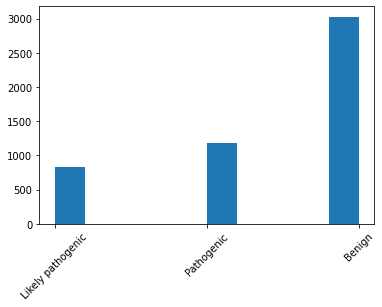

In [ ]:
df_comb_el_gnomad['ClinVar Clinical Significance'].hist(alpha=1,grid=False,xrot=45)

Plot VEP annotations for Benign and Not Benign classes.

Text(0.5, 0, 'VEP Annotation')

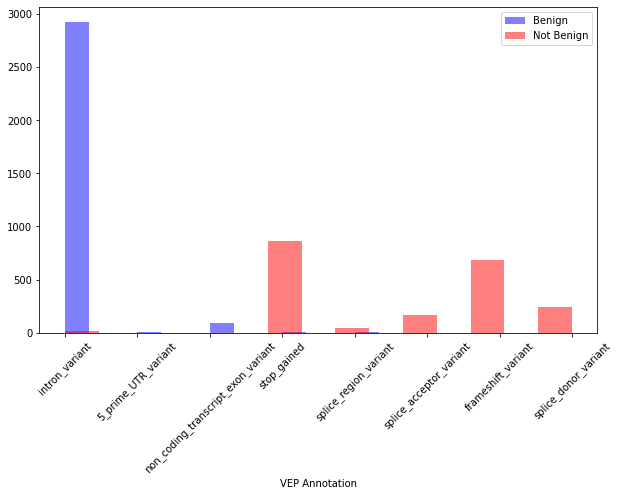

In [ ]:
plt.figure(figsize=(10,6))
df_comb_el_gnomad[df_comb_el_gnomad['ClinVar Clinical Significance']=='Benign']['VEP Annotation'].hist(
    alpha=0.5,color='blue',bins=15,label='Benign',xrot=45,grid=False)
df_comb_el_gnomad[df_comb_el_gnomad['ClinVar Clinical Significance']!='Benign']['VEP Annotation'].hist(
    alpha=0.5,color='red',bins=15,label='Not Benign',xrot=45,grid=False)
plt.legend()
plt.xlabel("VEP Annotation")

Plot allele frequencies for Benign and Not benign classes.

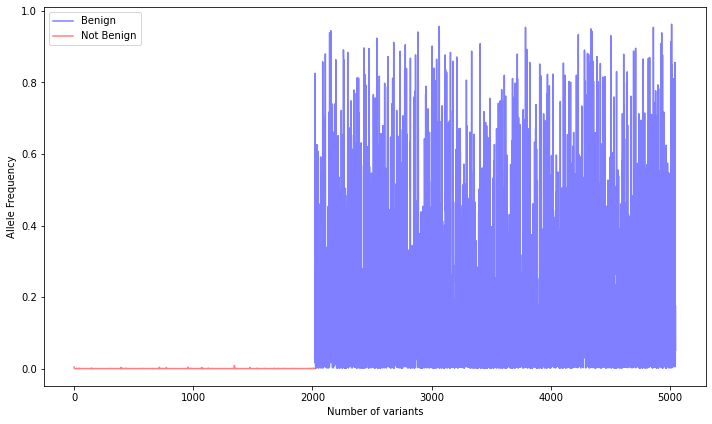

In [ ]:
plt.figure(figsize=(10,6))
df_comb_el_gnomad[df_comb_el_gnomad['ClinVar Clinical Significance']=='Benign']['Allele Frequency'].plot(alpha=0.5,color='blue',label='Benign')
df_comb_el_gnomad[df_comb_el_gnomad['ClinVar Clinical Significance']!='Benign']['Allele Frequency'].plot(alpha=0.5,color='red',label='Not Benign')
plt.legend()
plt.xlabel("Number of variants")
plt.ylabel("Allele Frequency")
plt.tight_layout()

Split features and lables.

In [ ]:
df_X = df_comb_el_gnomad
df_y = pd.DataFrame(df_comb_el_gnomad["ClinVar Clinical Significance"])

In [ ]:
df_y

,ClinVar Clinical Significance
0,Likely pathogenic
1,Likely pathogenic
2,Likely pathogenic
3,Likely pathogenic
4,Likely pathogenic
...,...
5043,Benign
5044,Benign
5045,Benign
5046,Benign


In [ ]:
df_X.drop('ClinVar Clinical Significance',axis=1,inplace=True)

In [ ]:
df_y

,ClinVar Clinical Significance
0,Likely pathogenic
1,Likely pathogenic
2,Likely pathogenic
3,Likely pathogenic
4,Likely pathogenic
...,...
5043,Benign
5044,Benign
5045,Benign
5046,Benign


In [ ]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 0 to 5047
Data columns (total 41 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Chromosome                                 5040 non-null   object 
 1   Reference                                  5040 non-null   object 
 2   Alternate                                  5040 non-null   object 
 3   VEP Annotation                             5040 non-null   object 
 4   Allele Count                               5040 non-null   float64
 5   Allele Frequency                           5040 non-null   float64
 6   Homozygote Count                           5040 non-null   int64  
 7   Hemizygote Count                           5040 non-null   int64  
 8   Allele Count African/African-American      5040 non-null   int64  
 9   Allele Number African/African-American     5040 non-null   int64  
 10  Homozygote Count African

Update data types.

In [ ]:
dict_astype = {"Chromosome":"category",  
               "Reference":"object",
               "Alternate":"object",
               "VEP Annotation":"category",\
               "Allele Count":"int32","Allele Frequency":"float64","Homozygote Count":"int32",\
               "Hemizygote Count":"int32","Allele Count African/African-American":"int32",\
               "Allele Number African/African-American":"int32",\
               "Homozygote Count African/African-American":"int32","Hemizygote Count African/African-American":"int32",\
               "Allele Count Latino/Admixed American":"int32","Allele Number Latino/Admixed American":"int32",\
               "Homozygote Count Latino/Admixed American":"int32",\
               "Hemizygote Count Latino/Admixed American":"int32","Allele Count Ashkenazi Jewish":"int32",\
               "Allele Number Ashkenazi Jewish":"int32","Homozygote Count Ashkenazi Jewish":"int32",\
               "Hemizygote Count Ashkenazi Jewish":"int32","Allele Count East Asian":"int32",\
               "Allele Number East Asian":"int32","Homozygote Count East Asian":"int32",\
               "Hemizygote Count East Asian":"int32","Allele Count European (Finnish)":"int32",\
               "Allele Number European (Finnish)":"int32","Homozygote Count European (Finnish)":"int32",\
               "Hemizygote Count European (Finnish)":"int32","Allele Count European (non-Finnish)":"int32",\
               "Allele Number European (non-Finnish)":"int32","Homozygote Count European (non-Finnish)":"int32",\
               "Hemizygote Count European (non-Finnish)":"int32","Allele Count Other":"int32",\
               "Allele Number Other":"int32","Homozygote Count Other":"int32","Hemizygote Count Other":"int32",\
               "Allele Count South Asian":"int32","Allele Number South Asian":"int32",\
               "Homozygote Count South Asian":"int32","Hemizygote Count South Asian":"int32",\
               "oe_lof_upper":"float64"}  #,"PHRED":"float64"}

In [ ]:
df_X = df_X.astype(dict_astype)
df_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 0 to 5047
Data columns (total 41 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   Chromosome                                 5040 non-null   category
 1   Reference                                  5040 non-null   object  
 2   Alternate                                  5040 non-null   object  
 3   VEP Annotation                             5040 non-null   category
 4   Allele Count                               5040 non-null   int32   
 5   Allele Frequency                           5040 non-null   float64 
 6   Homozygote Count                           5040 non-null   int32   
 7   Hemizygote Count                           5040 non-null   int32   
 8   Allele Count African/African-American      5040 non-null   int32   
 9   Allele Number African/African-American     5040 non-null   int32   
 10  Homozygote C

Numeric values for VEP Annotation

In [ ]:
tup_vep = df_X["VEP Annotation"].factorize()
tup_vep 

(array([0, 1, 1, ..., 5, 5, 5]),
 CategoricalIndex(['splice_acceptor_variant', 'frameshift_variant',
                   'stop_gained', 'splice_region_variant',
                   'splice_donor_variant', 'intron_variant',
                   '5_prime_UTR_variant', 'non_coding_transcript_exon_variant'],
                  categories=['5_prime_UTR_variant', 'frameshift_variant', 'intron_variant', 'non_coding_transcript_exon_variant', 'splice_acceptor_variant', 'splice_donor_variant', 'splice_region_variant', 'stop_gained'], ordered=False, dtype='category'))

In [ ]:
list_vep = tup_vep[0]

In [ ]:
df_X["VEP Annotation"] = list_vep
df_X["VEP Annotation"] 

0       0
1       1
2       1
3       2
4       2
       ..
5043    5
5044    5
5045    5
5046    5
5047    5
Name: VEP Annotation, Length: 5040, dtype: int64

In [ ]:
list_vep_char = list(tup_vep[1])
list_vep_char

['splice_acceptor_variant',
 'frameshift_variant',
 'stop_gained',
 'splice_region_variant',
 'splice_donor_variant',
 'intron_variant',
 '5_prime_UTR_variant',
 'non_coding_transcript_exon_variant']

Numeric values for Chromosome.

In [ ]:
tup_chrom = df_X["Chromosome"].factorize()
df_X["Chromosome"] = tup_chrom[0]
df_X["Chromosome"].value_counts()

2     513
10    477
8     355
4     336
20    306
3     296
17    294
19    270
16    231
1     230
11    210
7     207
0     187
12    168
5     166
18    158
9     147
15    109
6      92
21     90
13     82
14     75
22     41
Name: Chromosome, dtype: int64

In [ ]:
df_X["Chromosome"].nunique()

23

Convert Clinical Significance into numeric format.

In [ ]:
tup_y = df_y["ClinVar Clinical Significance"].factorize()
tup_y

(array([0, 0, 0, ..., 2, 2, 2]),
 Index(['Likely pathogenic', 'Pathogenic', 'Benign'], dtype='object'))

In [ ]:
df_y["ClinVar Clinical Significance"] = tup_y[0]
df_y

,ClinVar Clinical Significance
0,0
1,0
2,0
3,0
4,0
...,...
5043,2
5044,2
5045,2
5046,2


Convert Alternate and Reference alleles into numeric format using hash encoding.

In [ ]:
df_X['Alternate'].nunique()

68

In [ ]:
df_X['Reference'].nunique()

178

In [ ]:
hashEnc = HashingEncoder(cols=["Alternate","Reference"]).fit(df_X,df_y)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
df_X_transformed = hashEnc.transform(df_X)
df_X_transformed

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,Chromosome,VEP Annotation,Allele Count,Allele Frequency,Homozygote Count,Hemizygote Count,Allele Count African/African-American,Allele Number African/African-American,Homozygote Count African/African-American,Hemizygote Count African/African-American,Allele Count Latino/Admixed American,Allele Number Latino/Admixed American,Homozygote Count Latino/Admixed American,Hemizygote Count Latino/Admixed American,Allele Count Ashkenazi Jewish,Allele Number Ashkenazi Jewish,Homozygote Count Ashkenazi Jewish,Hemizygote Count Ashkenazi Jewish,Allele Count East Asian,Allele Number East Asian,Homozygote Count East Asian,Hemizygote Count East Asian,Allele Count European (Finnish),Allele Number European (Finnish),Homozygote Count European (Finnish),Hemizygote Count European (Finnish),Allele Count European (non-Finnish),Allele Number European (non-Finnish),Homozygote Count European (non-Finnish),Hemizygote Count European (non-Finnish),Allele Count Other,Allele Number Other,Homozygote Count Other,Hemizygote Count Other,Allele Count South Asian,Allele Number South Asian,Homozygote Count South Asian,Hemizygote Count South Asian,oe_lof_upper
0,0,0,0,1,0,0,0,1,0,0,1260,0.004460,2,0,24,24940,0,0,106,35436,0,0,130,10360,0,0,1,19952,0,0,42,25116,0,0,936,128900,2,0,18,7212,0,0,3,30616,0,0,1.145
1,0,1,0,0,0,0,0,1,0,1,221,0.000781,0,0,4,24964,0,0,13,35440,0,0,11,10370,0,0,0,19954,0,0,0,25124,0,0,189,129180,0,0,4,7226,0,0,0,30616,0,0,1.145
2,0,0,0,1,0,1,0,0,0,1,3,0.000012,0,0,0,16252,0,0,0,34588,0,0,0,10078,0,0,0,18394,0,0,0,21624,0,0,3,113738,0,0,0,6136,0,0,0,30616,0,0,1.145
3,0,1,0,0,0,0,0,1,0,2,32,0.000130,0,0,0,21330,0,0,0,31998,0,0,0,9570,0,0,1,17686,0,0,0,21656,0,0,31,110052,0,0,0,6406,0,0,0,27928,0,0,1.145
4,0,0,0,1,0,0,0,1,0,2,3,0.000014,0,0,1,15578,0,0,0,27554,0,0,0,7154,0,0,0,16708,0,0,0,19838,0,0,2,98612,0,0,0,5136,0,0,0,25376,0,0,0.534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5043,0,0,0,1,0,0,0,1,11,5,216,0.005003,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,216,43274,1,0,0.000
5044,0,1,0,0,0,0,0,1,8,5,1851,0.042456,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1851,43620,33,0,0.000
5045,0,1,0,0,0,0,0,1,15,5,518,0.011621,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,518,44609,5,0,0.000
5046,0,1,0,1,0,0,0,0,20,5,7752,0.176462,486,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7752,43933,486,0,0.000


In [ ]:
df_X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 0 to 5047
Data columns (total 47 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   col_0                                      5040 non-null   int64  
 1   col_1                                      5040 non-null   int64  
 2   col_2                                      5040 non-null   int64  
 3   col_3                                      5040 non-null   int64  
 4   col_4                                      5040 non-null   int64  
 5   col_5                                      5040 non-null   int64  
 6   col_6                                      5040 non-null   int64  
 7   col_7                                      5040 non-null   int64  
 8   Chromosome                                 5040 non-null   int64  
 9   VEP Annotation                             5040 non-null   int64  
 10  Allele Count            

In [ ]:
df_y.value_counts()

ClinVar Clinical Significance
2                                3028
1                                1175
0                                 837
dtype: int64

Save the processed data to google drive

In [ ]:
df_X_transformed.to_csv("/content/drive/MyDrive/MSc-project-lof/df_X_iter3_v1_transformed_ready to train.csv", index=False)
df_y.to_csv("/content/drive/MyDrive/MSc-project-lof/df_y_iter3_v1_transformed_ready to train.csv", index=False)